In [1]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

# Import API key
from config import geoapify_key

In [2]:
# Read in csv files
nyc_airbnbs = pd.read_csv("AB_NYC_2019.csv")
nyc_airbnbs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# check N/A values; drop N/A values if necessary 
nyc_airbnbs.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


## Analysis of neighborhoods

In [4]:
# Number of unique neighborhood groups
nyc_airbnbs.neighbourhood_group.nunique()

5

In [5]:
# What are the neighbourhood groups listed?
nyc_airbnbs.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
# How many listings are in each neighborhood groups?
nyc_airbnbs.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, '')

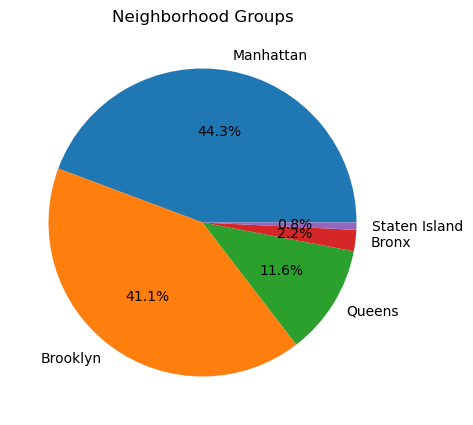

In [7]:
pieplot1 = nyc_airbnbs.neighbourhood_group.value_counts().plot.pie(title='Neighborhood Groups',
                                               figsize=(5,5),
                                              autopct='%1.1f%%')
pieplot1.set_ylabel(None)

In [8]:
# Number of unique neighborhoods
nyc_airbnbs.neighbourhood.nunique()

221

In [9]:
# What are the neighborhoods listed?
nyc_airbnbs.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [10]:
# How many listings are in each neighborhoods?
nyc_airbnbs.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

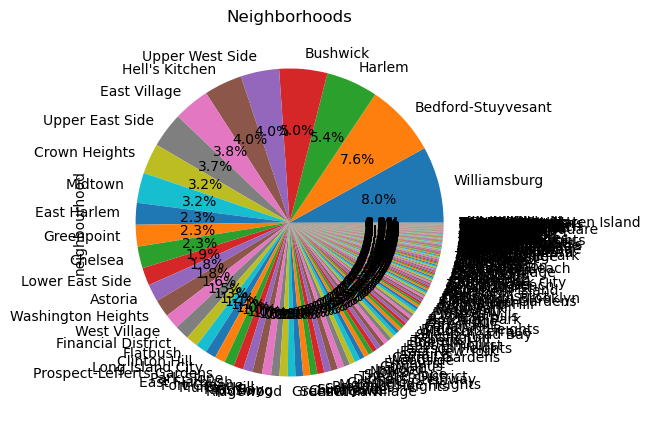

In [11]:
pieplot2 = nyc_airbnbs.neighbourhood.value_counts().plot.pie(title='Neighborhoods',
                                               figsize=(5,5),
                                              autopct='%1.1f%%')

In [12]:
# Convert neighbourhood Series to Dataframe
neighbourhood_df = nyc_airbnbs.neighbourhood.value_counts()
neighbourhood_df = neighbourhood_df.to_frame()

# Rename column to count for easier reading
neighbourhood_df = neighbourhood_df.rename(columns={'neighbourhood':'count'})

# Examination
neighbourhood_df.head()

,count
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971


## Analysis of room types

In [13]:
# What are the different room types available?
nyc_airbnbs.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
# How many listings are under each room type category?
nyc_airbnbs.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0, 0.5, 'Number of listings')

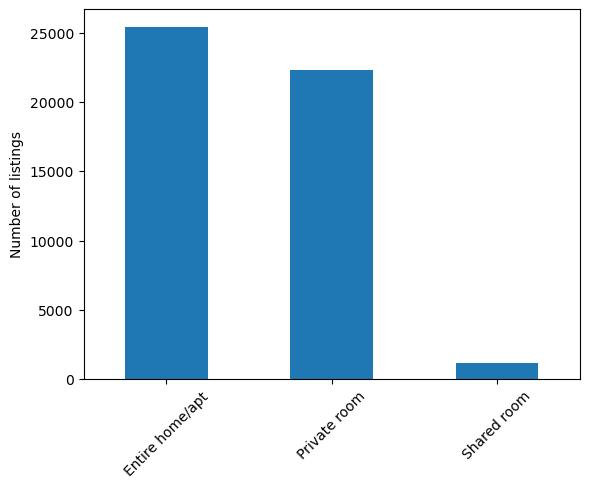

In [15]:
barplot1 = nyc_airbnbs.room_type.value_counts().plot.bar(rot=45)
barplot1.set_ylabel("Number of listings")

In [16]:
neighbourhood_group_room_type = nyc_airbnbs.groupby(['neighbourhood_group','room_type']).size().reset_index()
neighbourhood_group_room_type.columns = ['neighbourhood_group','room_type','count']
neighbourhood_group_room_type

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [17]:
neighbourhood_group_room_type=neighbourhood_group_room_type.pivot_table(index=['neighbourhood_group'],columns=['room_type'], values=['count'])
neighbourhood_group_room_type

count                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                           379          652          60
Brooklyn                       9559        10132         413
Manhattan                     13199         7982         480
Queens                         2096         3372         198
Staten Island                   176          188           9

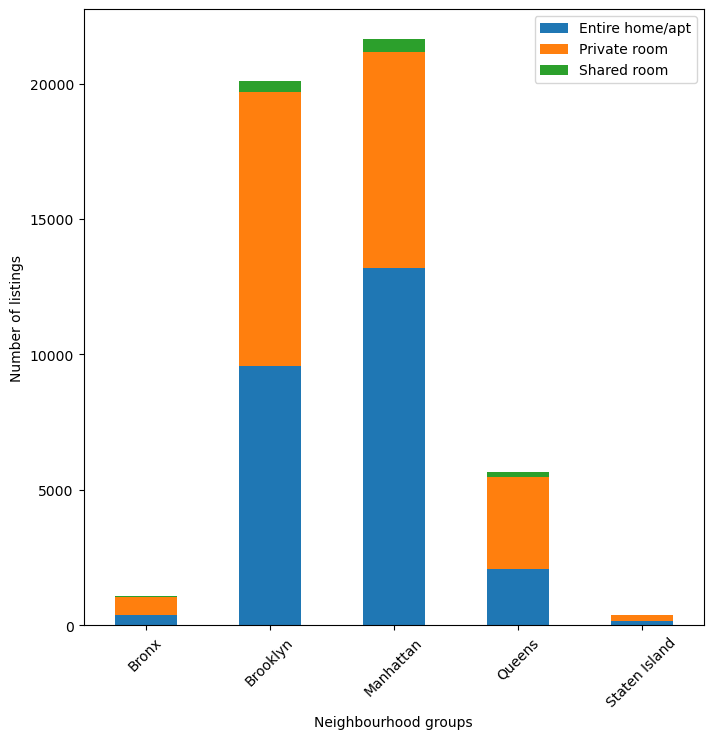

In [18]:
barplot2 = neighbourhood_group_room_type.plot.bar(stacked=True, rot=45, figsize=(8,8))
barplot2.set_ylabel("Number of listings")
barplot2.set_xlabel("Neighbourhood groups")
barplot2.legend(['Entire home/apt','Private room','Shared room'])